In [4]:
import pandas as pd
import numpy as np
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder,power_transform
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
df.shape

(1000, 40)

In [8]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
df.isnull().sum().sum()

1000

In [10]:
(df == 0).any(axis=1)

0       True
1       True
2       True
3      False
4       True
       ...  
995     True
996     True
997     True
998     True
999     True
Length: 1000, dtype: bool

In [11]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [12]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [13]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,NaN
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,NaN
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,NaN
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,NaN
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,NaN
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,NaN
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,NaN
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,NaN
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,NaN
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,NaN


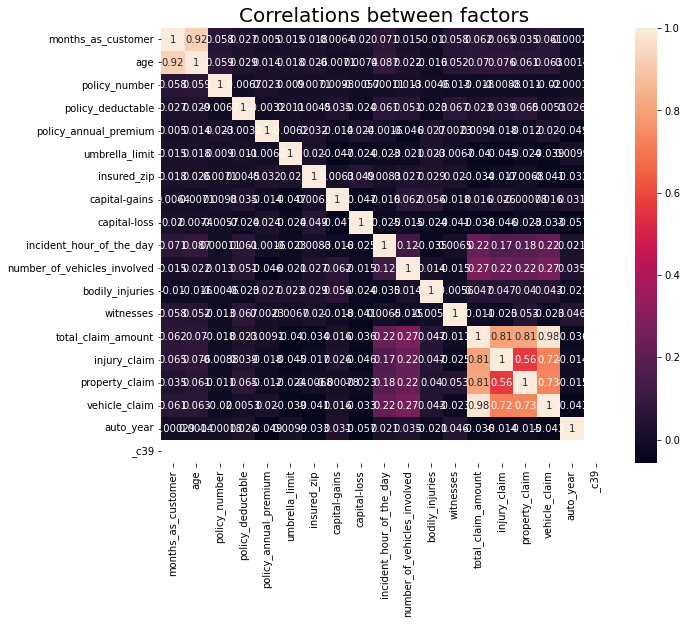

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlations between factors',fontsize=20)
plt.savefig('correlation_between _factors.jpg')
plt.show()

In [15]:
#NOW we check for skewness in data

df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
_c39                                NaN
dtype: float64

In [16]:
df = df.drop(columns=['_c39'])

In [17]:
#using label encoder for categorical target (Loan_Status) for encoding 
le=LabelEncoder()
df['fraud_reported']=le.fit_transform(df['fraud_reported'])

In [18]:
le.inverse_transform([0,1])

array(['N', 'Y'], dtype=object)

In [19]:
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,1
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,3,1.0,34650,7700,3850,23100,4.0,30.0,2007,0
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,...,2,1.0,63400,6340,6340,50720,3.0,34.0,2014,1
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,1,1.0,6500,1300,650,4550,0.0,31.0,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487.0,2.0,2.0,1000,1310.80,0,431289,...,1,0.0,87200,17440,8720,61040,6.0,6.0,2006,0
996,285,41,186934,129.0,0.0,0.0,1000,1436.79,0,608177,...,3,0.0,108480,18080,18080,72320,13.0,28.0,2015,0
997,130,34,918516,509.0,2.0,1.0,500,1383.49,3000000,442797,...,3,2.0,67500,7500,7500,52500,11.0,19.0,1996,0
998,458,62,533940,573.0,0.0,2.0,2000,1356.92,5000000,441714,...,1,2.0,46980,5220,5220,36540,1.0,5.0,1998,0


0    753
1    247
Name: fraud_reported, dtype: int64

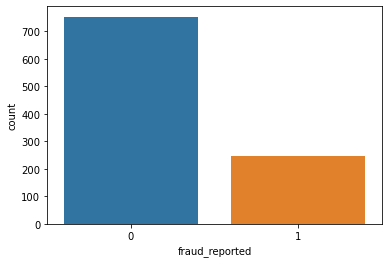

In [20]:
#now we see the count of loan status
sns.countplot(df['fraud_reported'])
df['fraud_reported'].value_counts()

In [21]:
#loan application approved more no of times than it is rejected.....

correlations = df.corr()['fraud_reported'].sort_values(ascending=False)
print(correlations)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
collision_type                 0.110130
injury_claim                   0.090975
policy_bind_date               0.060642
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
incident_location             -0.008832
policy_annual_premium         -0.014480


<AxesSubplot:>

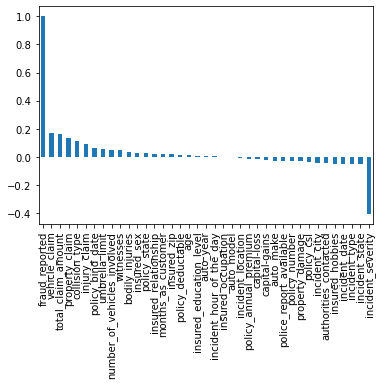

In [22]:
#the attributes share positive as well as negaative correlation with the target

correlations.plot(kind='bar')

In [23]:
df.corr()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.055055,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,...,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,...,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.045713,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,...,-0.012661,0.032019,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_bind_date,0.055055,0.056538,0.045713,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024866,-0.042749,...,-0.007004,-0.034920,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000328,-0.014533,0.072815,0.015289,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,...,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,0.008486,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,...,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,...,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,...,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.024866,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,...,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,-0.042749,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,...,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368


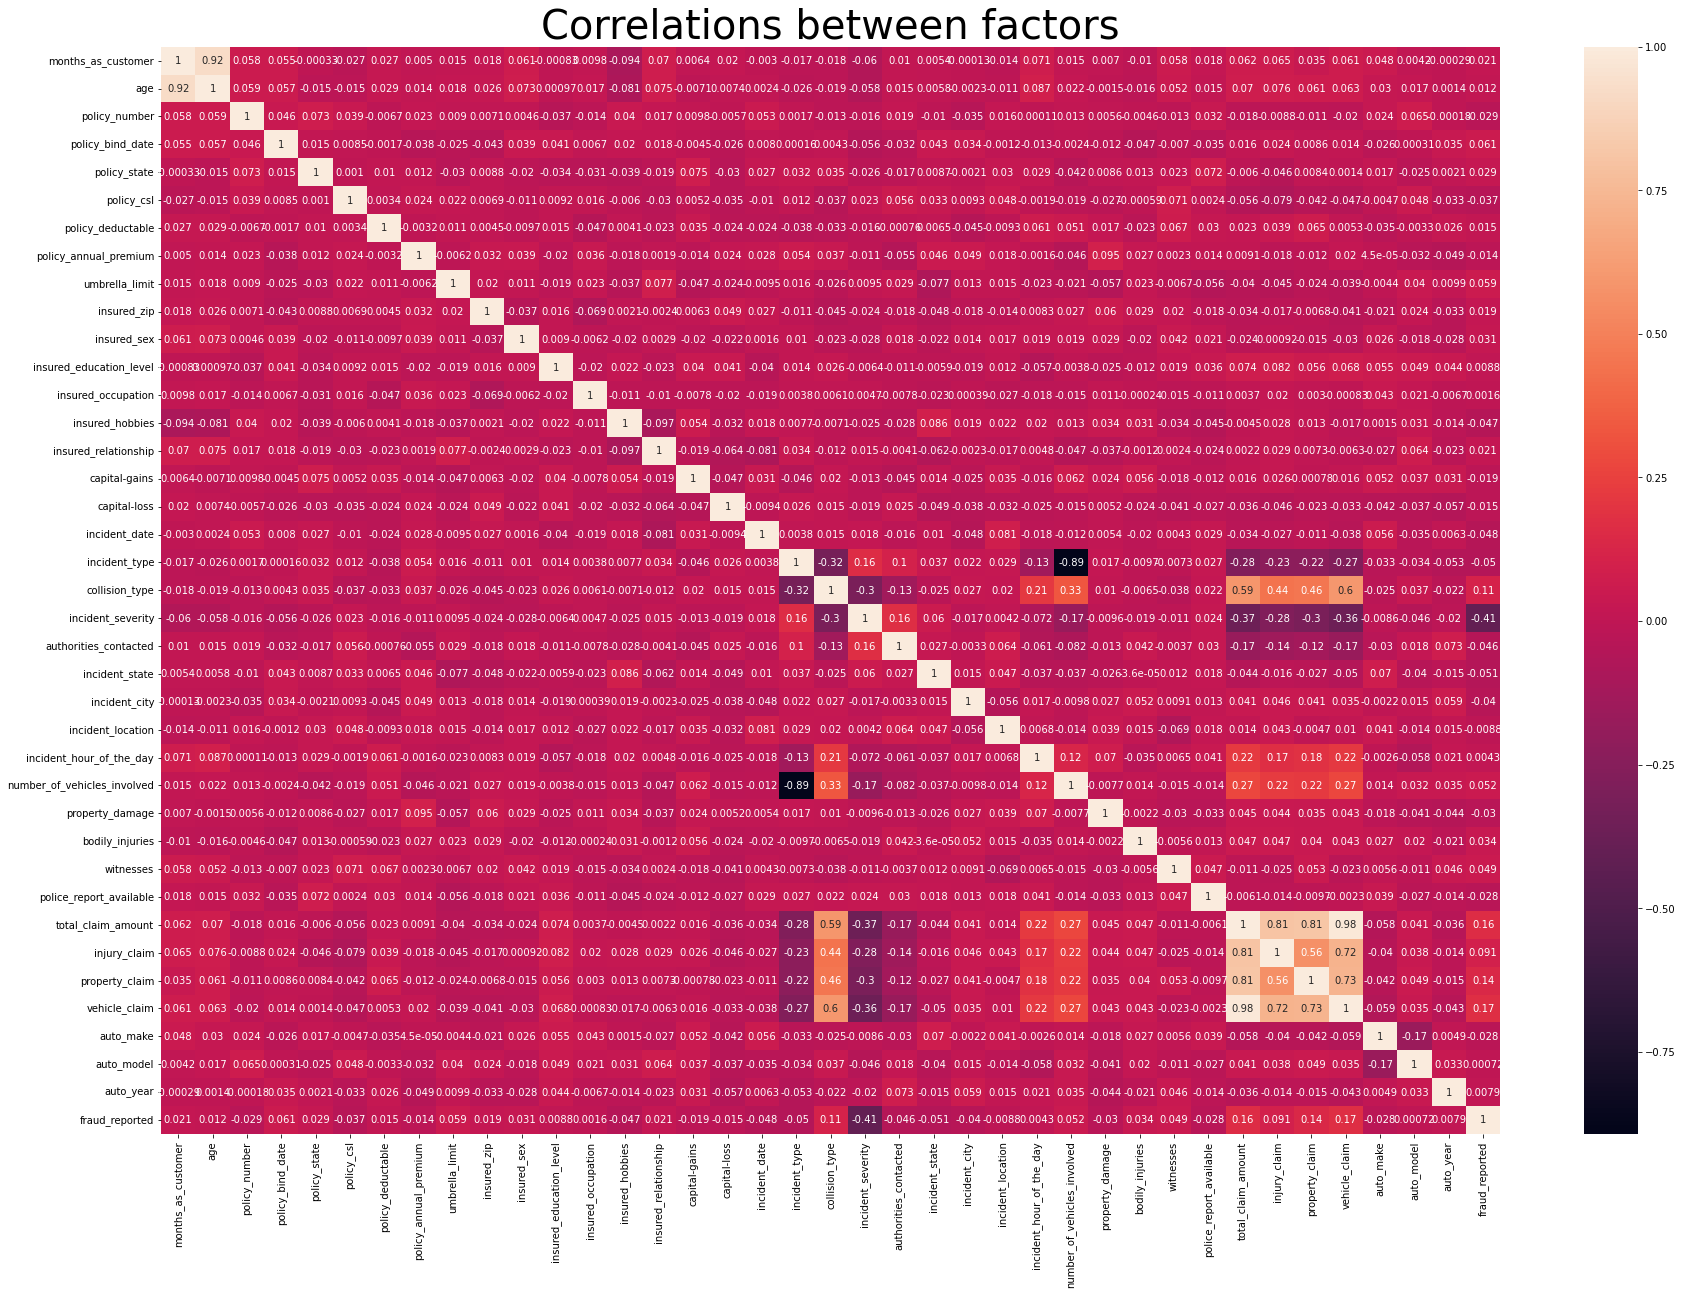

In [24]:
#this plot shows the correlation features and target with the each other
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlations between factors',fontsize=40)
plt.savefig('correlation_between _factors.jpg')
plt.show()

<AxesSubplot:xlabel='fraud_reported', ylabel='months_as_customer'>

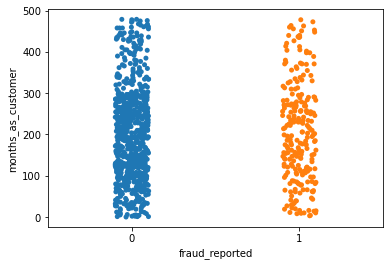

In [25]:
sns.stripplot(x='fraud_reported',y='months_as_customer', data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='age'>

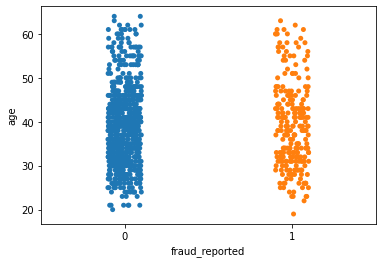

In [26]:
#the applicants who have income between  0 to 25000 have more chances of loan application approval.....

sns.stripplot(x='fraud_reported',y='age', data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='umbrella_limit'>

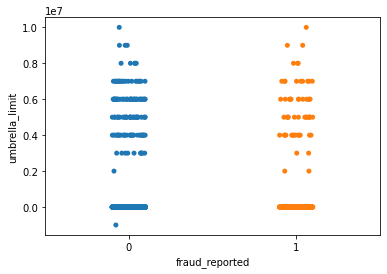

In [27]:
sns.stripplot(x='fraud_reported',y='umbrella_limit', data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

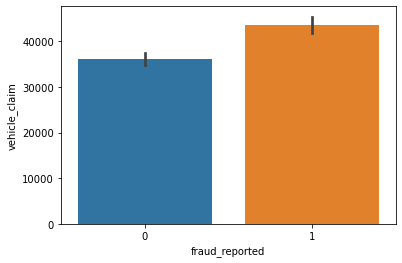

In [28]:
sns.barplot(x="fraud_reported", y="vehicle_claim", data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

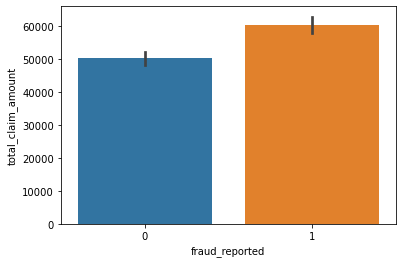

In [29]:
sns.barplot(x="fraud_reported", y="total_claim_amount", data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='injury_claim'>

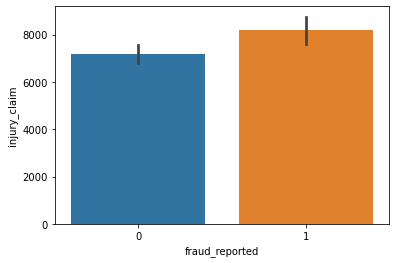

In [30]:
sns.barplot(x="fraud_reported", y="injury_claim", data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='property_claim'>

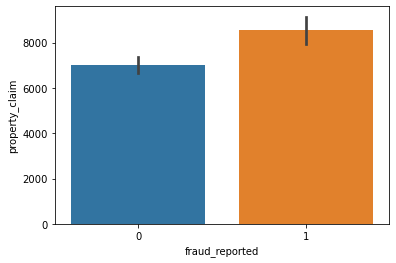

In [31]:
sns.barplot(x="fraud_reported", y="property_claim", data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

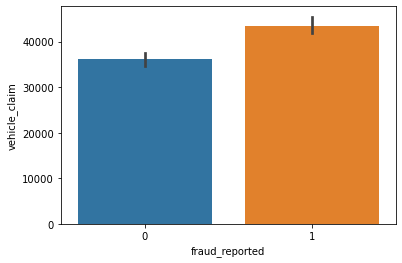

In [32]:
sns.barplot(x="fraud_reported", y="vehicle_claim", data=df)

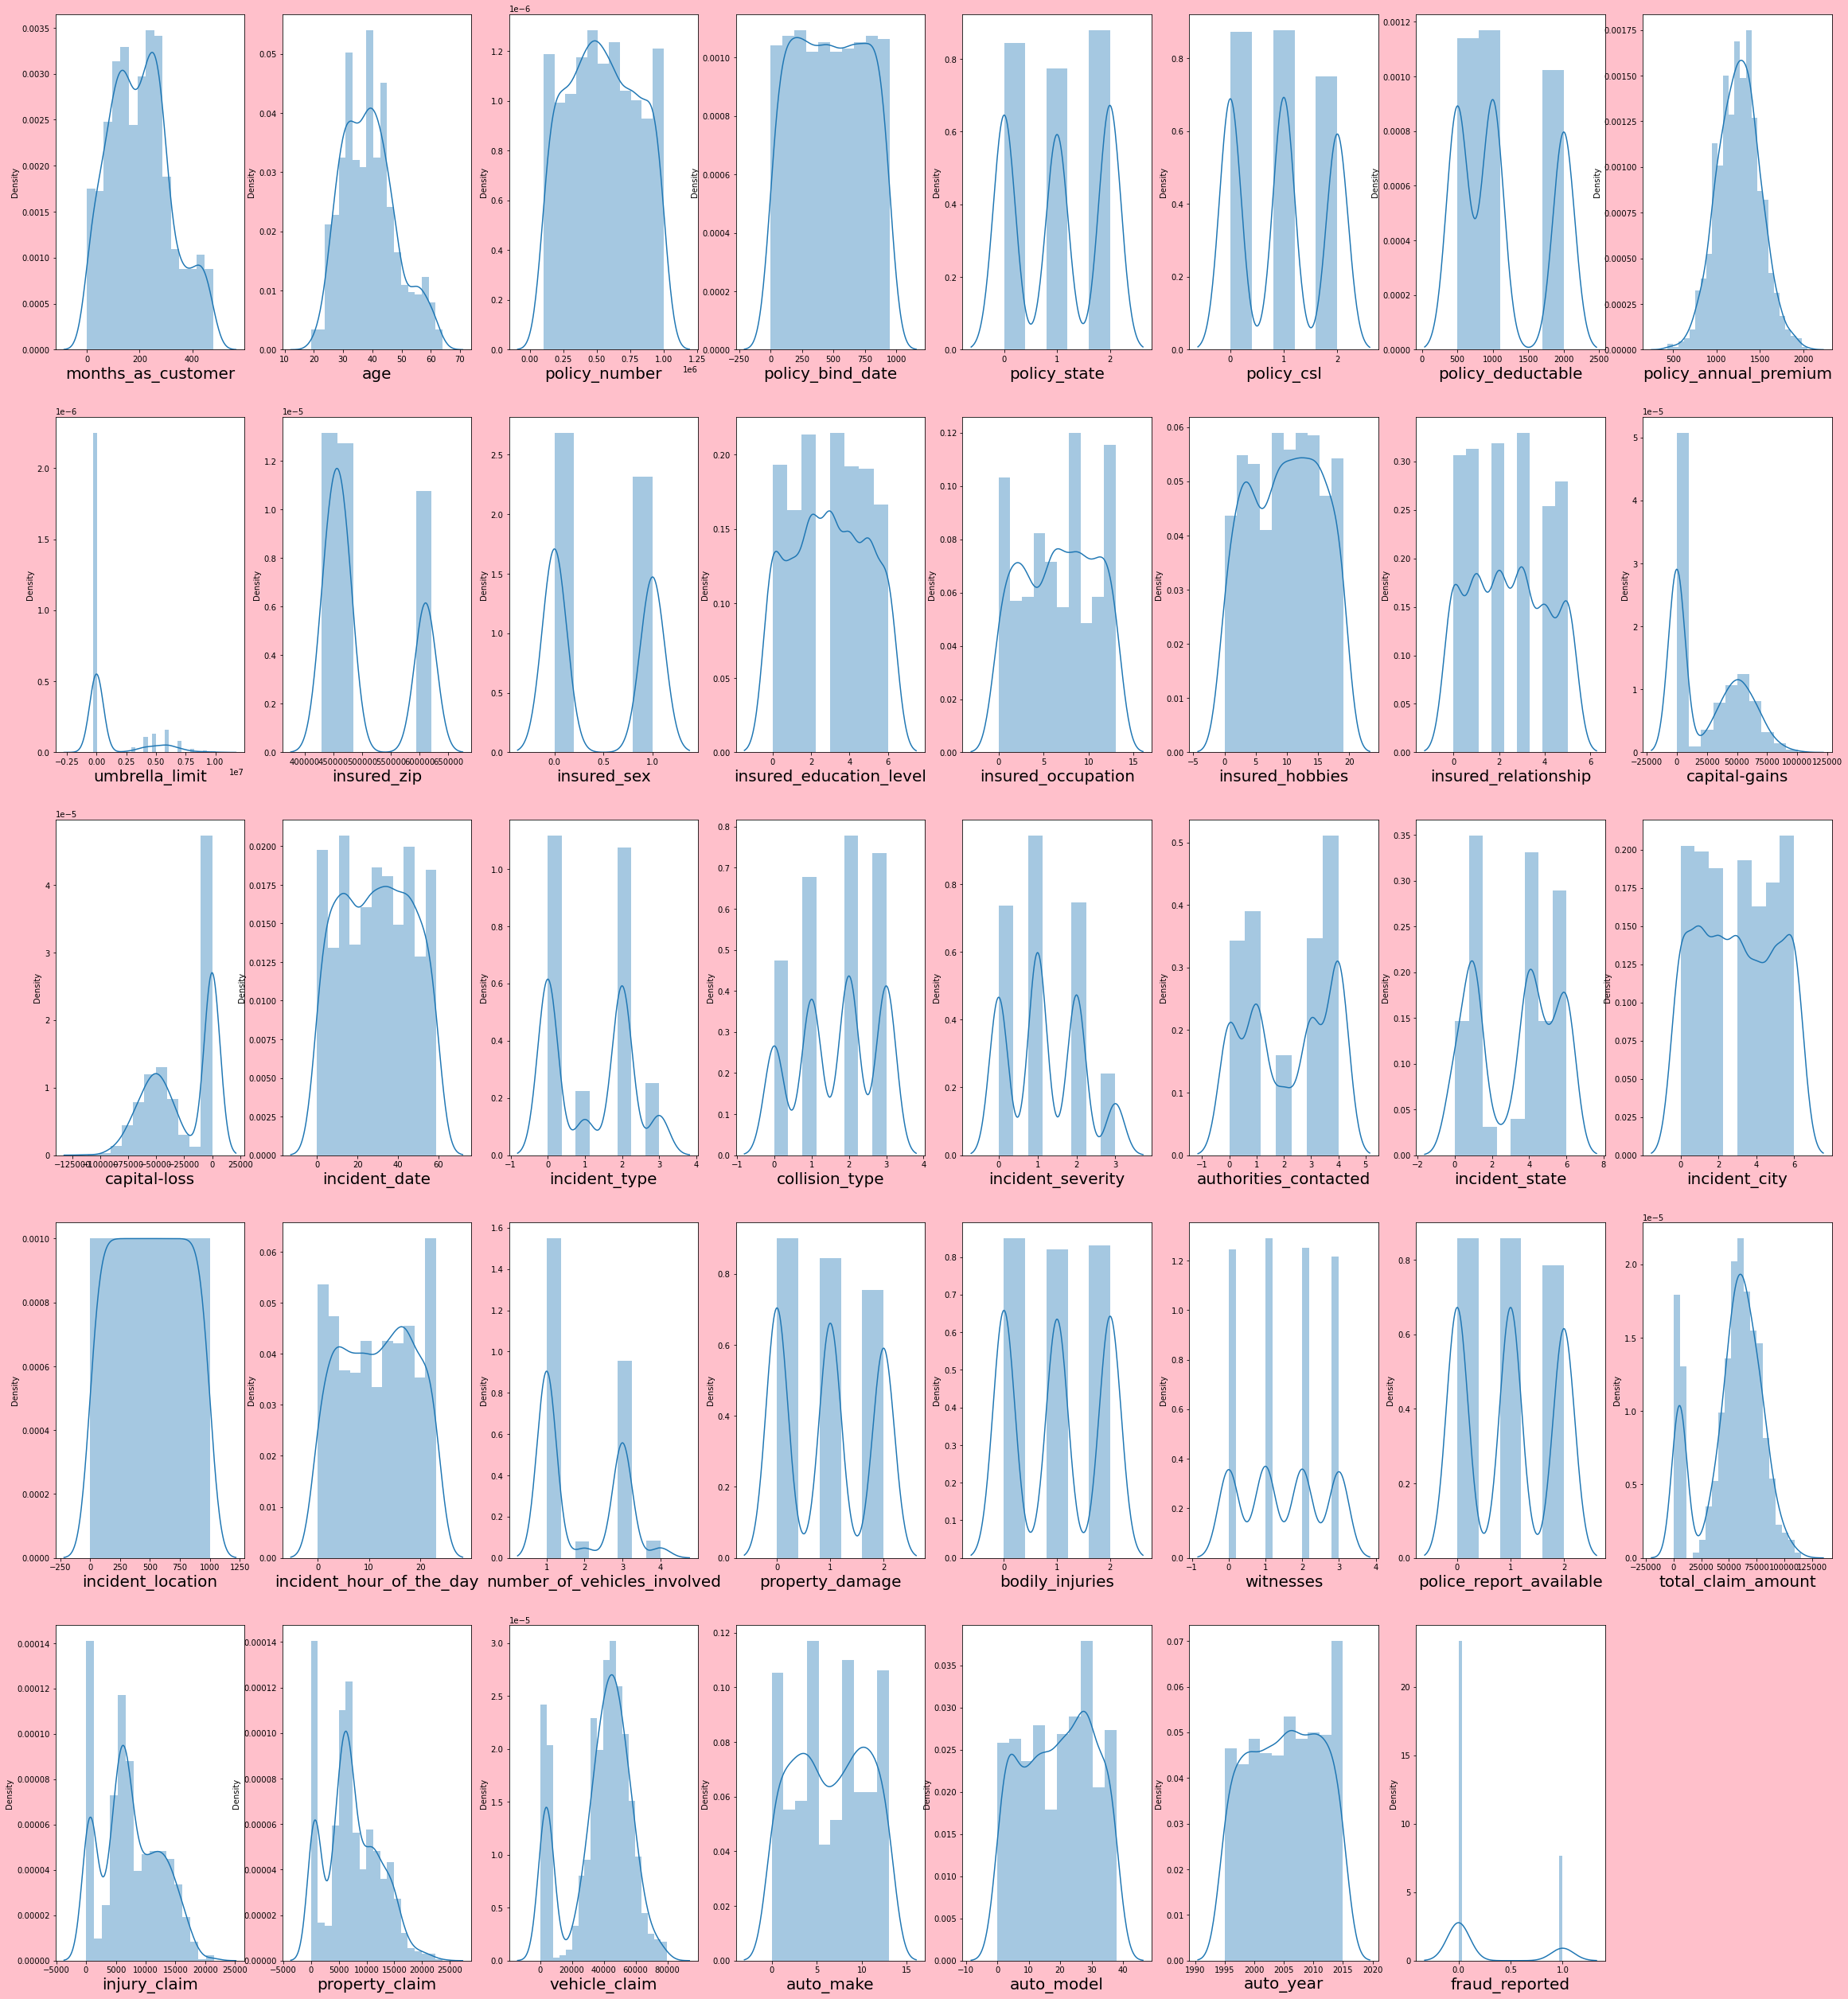

In [33]:
plt.figure(figsize=(40,45),facecolor='pink')
plotnumber=1

for column in df:
    if plotnumber<=40:
        ax = plt.subplot(5,8,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [34]:
y = df['fraud_reported']
X = df.drop(columns=['fraud_reported'])

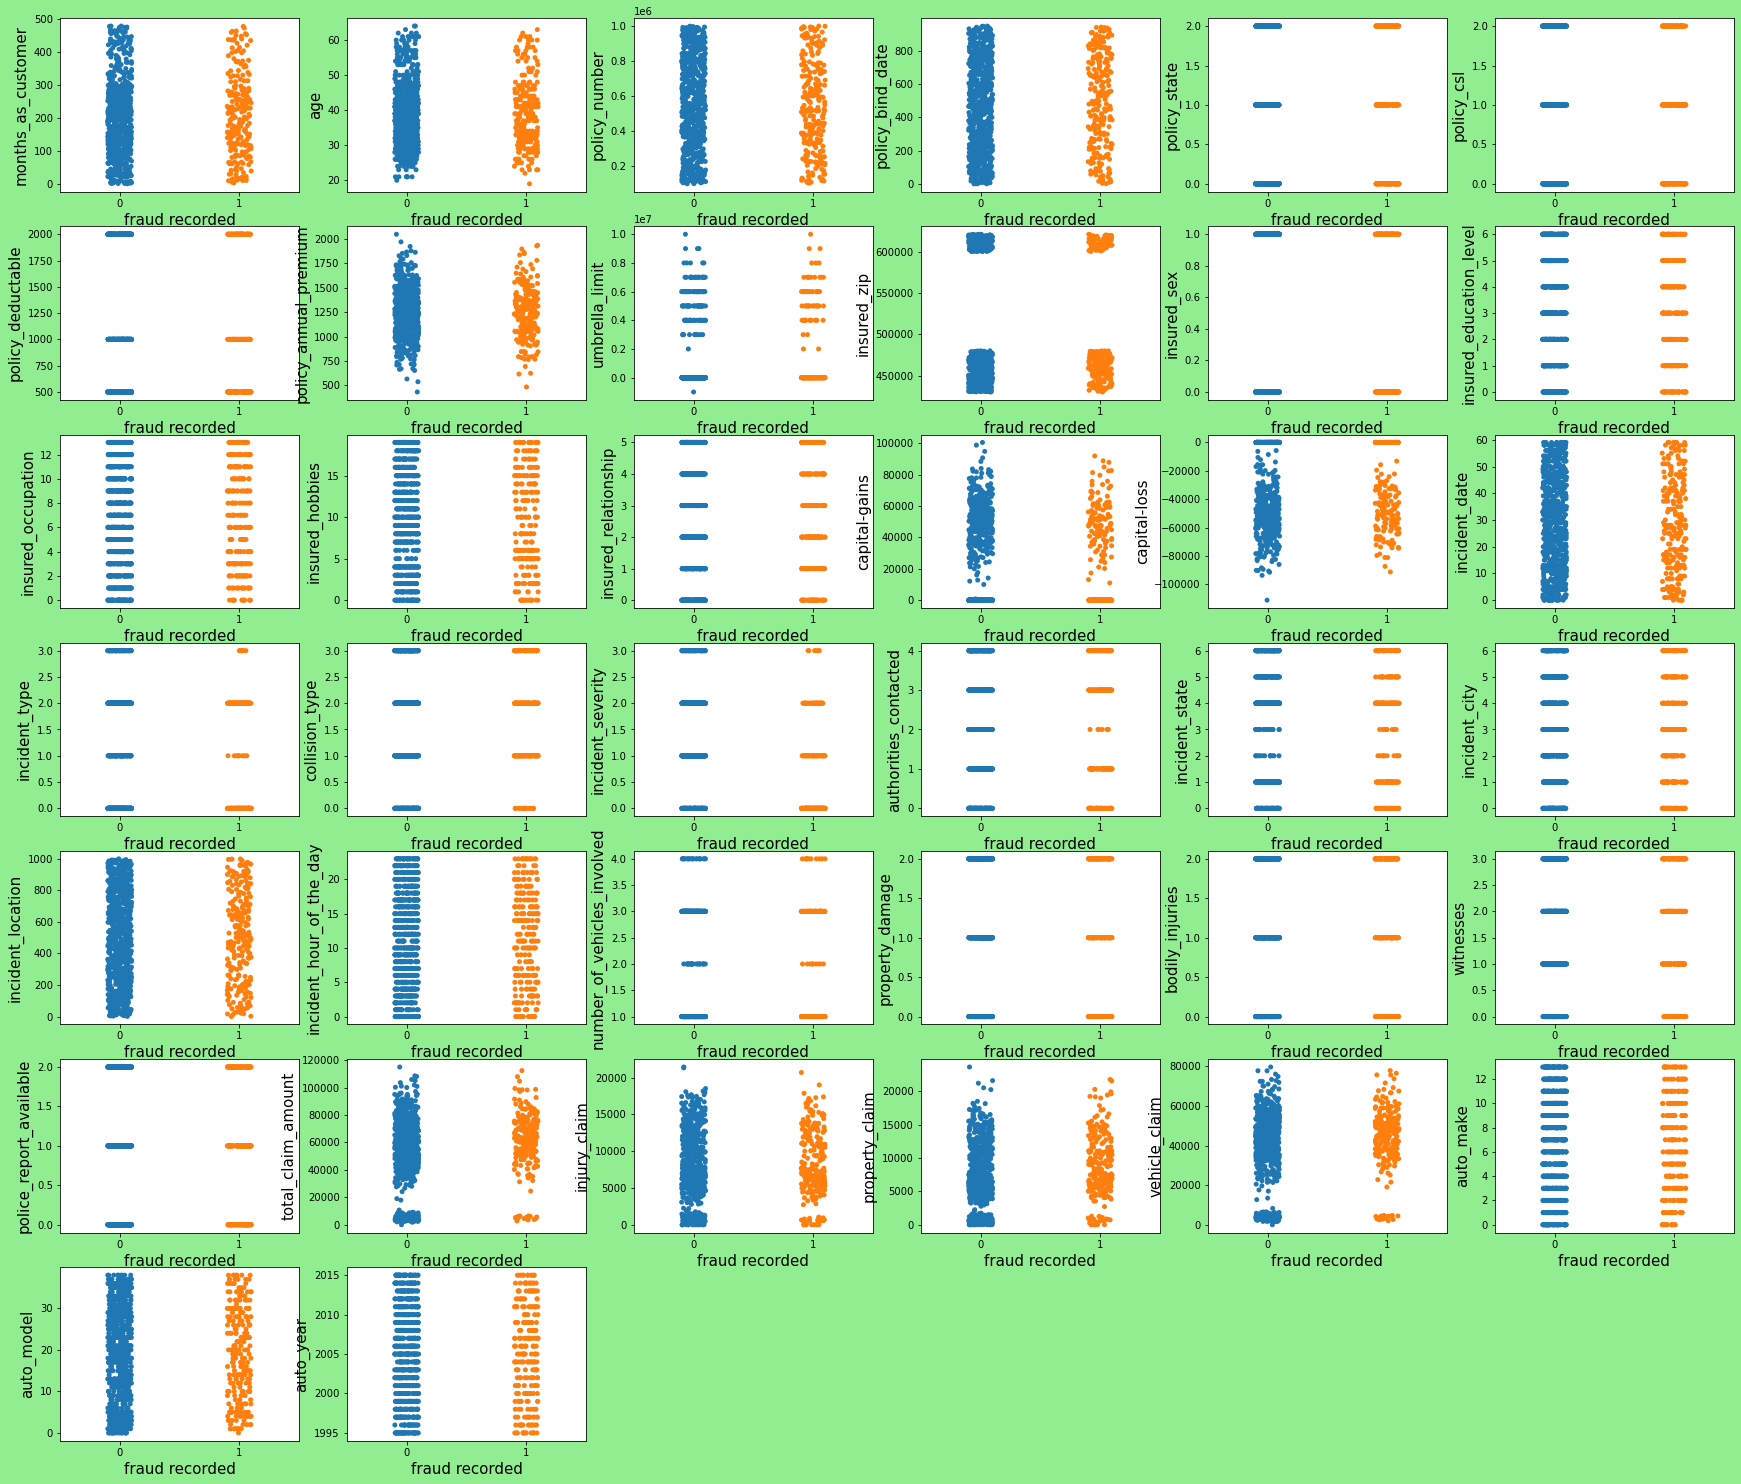

In [35]:
plt.figure(figsize=(30,30),facecolor='lightgreen')
plotnumber=1

for column in X:
    if plotnumber<=40:
        ax = plt.subplot(8,6,plotnumber)
        sns.stripplot(y,X[column])
        plt.xlabel('fraud recorded',fontsize=15)
        plt.ylabel(column,fontsize=15)
    plotnumber+=1
plt.show()

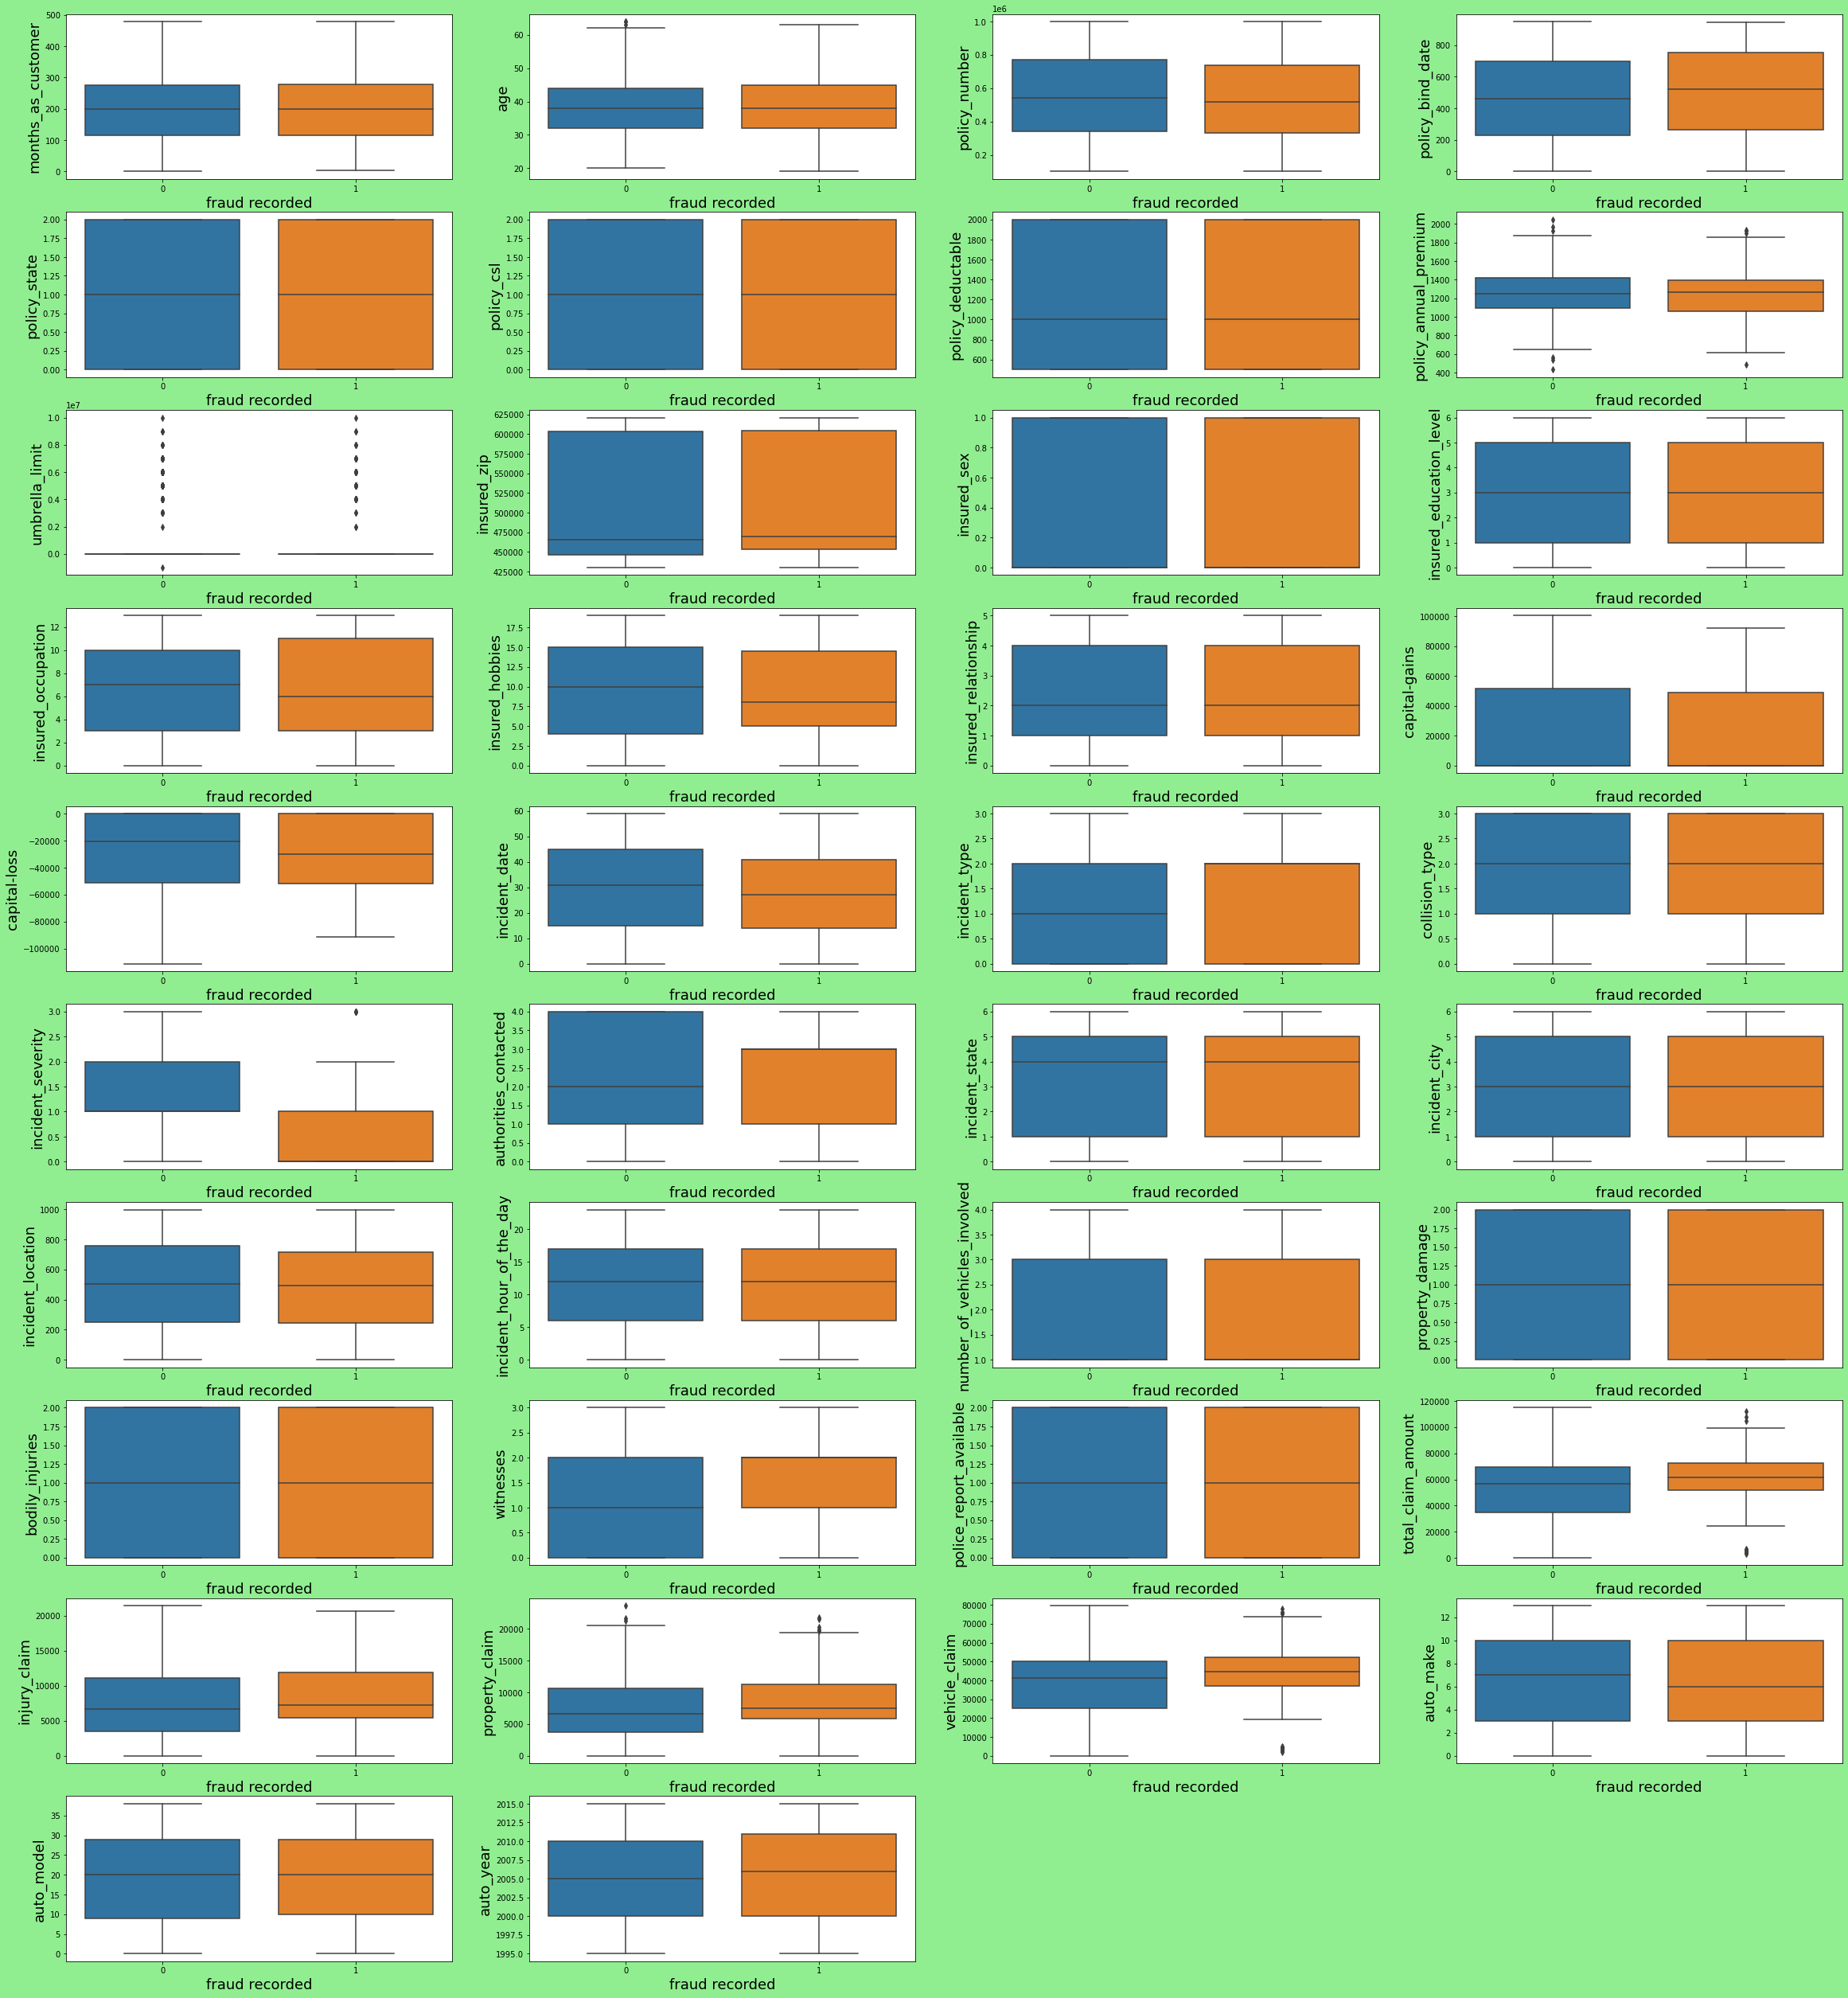

In [36]:
plt.figure(figsize=(40,45),facecolor='lightgreen')
plotnumber=1

for column in X:
    if plotnumber<=40:
        ax = plt.subplot(10,4,plotnumber)
        sns.boxplot(y,X[column])
        plt.xlabel('fraud recorded',fontsize=18)
        plt.ylabel(column,fontsize=18)
    plotnumber+=1
plt.show()

In [37]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


In [38]:
#now we remove skewness by power transform...

x_new=power_transform(X)

In [39]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

26    0.363693
10    0.148630
16    0.090488
15    0.038722
6     0.023988
7     0.004758
9     0.000000
1    -0.001945
37   -0.012491
20   -0.079282
18   -0.088766
27   -0.091082
5    -0.100769
30   -0.114352
28   -0.128799
0    -0.135661
4    -0.145377
29   -0.153648
2    -0.160374
14   -0.160421
23   -0.181772
11   -0.188564
19   -0.204204
21   -0.227269
35   -0.227539
12   -0.239336
13   -0.247798
22   -0.255777
25   -0.256957
17   -0.264053
36   -0.278611
24   -0.288423
3    -0.291937
33   -0.358814
32   -0.415781
31   -0.510354
34   -0.522718
8    -7.865930
dtype: float64

In [40]:

(np.sqrt(df.iloc[:,8]))

0         0.000000
1      2236.067977
2      2236.067977
3      2449.489743
4      2449.489743
          ...     
995       0.000000
996       0.000000
997    1732.050808
998    2236.067977
999       0.000000
Name: umbrella_limit, Length: 1000, dtype: float64

In [41]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


In [42]:
from scipy.stats import zscore
(np.abs(zscore(X))<3).all()

months_as_customer              True
age                             True
policy_number                   True
policy_bind_date                True
policy_state                    True
policy_csl                      True
policy_deductable               True
policy_annual_premium          False
umbrella_limit                 False
insured_zip                     True
insured_sex                     True
insured_education_level         True
insured_occupation              True
insured_hobbies                 True
insured_relationship            True
capital-gains                   True
capital-loss                   False
incident_date                   True
incident_type                   True
collision_type                  True
incident_severity               True
authorities_contacted           True
incident_state                  True
incident_city                   True
incident_location               True
incident_hour_of_the_day        True
number_of_vehicles_involved     True
p

In [43]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['policy_annual_premium']))
print(z)

0      0.616705
1      0.242521
2      0.642233
3      0.652886
4      1.341980
         ...   
995    0.222884
996    0.739141
997    0.520739
998    0.411866
999    2.008710
Name: policy_annual_premium, Length: 1000, dtype: float64


In [44]:
index=np.where(z > 3)
index

(array([229, 248, 763], dtype=int64),)

In [45]:
df = df.drop(df.index[index])
df.shape

(997, 39)

In [46]:
z = np.abs(stats.zscore(df['umbrella_limit']))
print(z)

0      0.480363
1      1.694577
2      1.694577
3      2.129565
4      2.129565
         ...   
995    0.480363
996    0.480363
997    0.824601
998    1.694577
999    0.480363
Name: umbrella_limit, Length: 997, dtype: float64


In [47]:
index=np.where(z > 3)
index

(array([ 88, 115, 428, 456, 655, 698, 972], dtype=int64),)

In [48]:
df = df.drop(df.index[index])
df.shape

(990, 39)

In [49]:
z = np.abs(stats.zscore(df['capital-loss']))
print(z)

0      0.949731
1      0.949731
2      0.949731
3      1.277195
4      0.691913
         ...   
995    0.949731
996    0.949731
997    0.949731
998    0.949731
999    0.949731
Name: capital-loss, Length: 990, dtype: float64


In [50]:
index=np.where(z > 3)
index

(array([798], dtype=int64),)

In [51]:
df = df.drop(df.index[index])
df.shape

(989, 39)

In [52]:
z = np.abs(stats.zscore(df['capital-loss']))
print(z)

index=np.where(z > 3)
index

df = df.drop(df.index[index])
df.shape

0      0.950583
1      0.950583
2      0.950583
3      1.285519
4      0.697826
         ...   
995    0.950583
996    0.950583
997    0.950583
998    0.950583
999    0.950583
Name: capital-loss, Length: 989, dtype: float64


(989, 39)

In [53]:
#Data scaling Z=(X-mean)/std:

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [54]:
X_scaled.shape[1]

38

In [55]:
#now train and test split  and training and fitting test model at random state 0 so that we can find best random state:
for i in range(0,100):
    X_train,X_test,y_train,y_test =train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    reg=LogisticRegression()
    reg.fit(X_train,y_train)
    pred_train = reg.predict(X_train)
    y_pred= reg.predict(X_test)
    print(f"At random state{i},the training accuracy is:-{accuracy_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:-{accuracy_score(y_test,y_pred)}")
    print("\n")

At random state0,the training accuracy is:-0.8125
At random state0,the testing accuracy is:-0.75


At random state1,the training accuracy is:-0.80375
At random state1,the testing accuracy is:-0.76


At random state2,the training accuracy is:-0.81
At random state2,the testing accuracy is:-0.795


At random state3,the training accuracy is:-0.80375
At random state3,the testing accuracy is:-0.775


At random state4,the training accuracy is:-0.81
At random state4,the testing accuracy is:-0.735


At random state5,the training accuracy is:-0.79875
At random state5,the testing accuracy is:-0.77


At random state6,the training accuracy is:-0.8125
At random state6,the testing accuracy is:-0.805


At random state7,the training accuracy is:-0.81
At random state7,the testing accuracy is:-0.76


At random state8,the training accuracy is:-0.8
At random state8,the testing accuracy is:-0.79


At random state9,the training accuracy is:-0.81
At random state9,the testing accuracy is:-0.785


At random sta

In [56]:
#so as we can interpret random state 8 is giving best train and test accuracy,so we train our model at random state 8:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [57]:
X_train.shape

(800, 38)

In [58]:
y_train.shape

(800,)

In [59]:
X_test.shape

(200, 38)

In [60]:
y_test.shape

(200,)

In [61]:
#now fitting our data to Machine learning models :

reg=LogisticRegression()
reg.fit(X_train,y_train)
y_pred= reg.predict(X_test)   
reg.score(X_train,y_train)
reg_score=accuracy_score(y_test,y_pred)
print('accuracy score:',reg_score*100)

regscore=cross_val_score(reg,X,y,cv=5)
lr=regscore.mean()
print('cross val score:',lr*100)

accuracy score: 76.5
cross val score: 75.1


In [62]:
svm= SVC()  
svm.fit(X_train, y_train)  
svm.score(X_train,y_train)
y_pred=svm.predict(X_test)
svm_score=accuracy_score(y_test,y_pred)
print('accuracy score:',svm_score*100)

svmscore=cross_val_score(svm,X,y,cv=5)
sv=svmscore.mean()
print('cross val score:',sv*100)

accuracy score: 77.0
cross val score: 75.29999999999998


In [63]:
knc= KNeighborsClassifier()  
knc.fit(X_train, y_train)  
knc.score(X_train,y_train)
y_pred=knc.predict(X_test)
knc_score=accuracy_score(y_test,y_pred)
print('accuracy score:',knc_score*100)

kncscore=cross_val_score(knc,X,y,cv=5)
kn=kncscore.mean()
print('cross val score:',kn*100)

accuracy score: 72.5
cross val score: 70.39999999999999


In [64]:
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
y_pred=dt.predict(X_test)
dts=accuracy_score(y_test,y_pred)
print('accuracy score:',dts*100)

dtscore=cross_val_score(dt,X,y,cv=5)
dtc=dtscore.mean()
print('cross val score:',dtc*100)

accuracy score: 76.0
cross val score: 78.4


In [65]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_train,y_train)
y_pred=rf.predict(X_test)
rfs=accuracy_score(y_test,y_pred)
print('accuracy score:',rfs*100)

rfscore=cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

accuracy score: 82.0
cross val score: 78.2


In [66]:
#so according to dataset  LogisticRegression and Randomforestclassifier is getting best accuracy of 80%
#we will go ahead with RandomForestClassifier
#now we do gridsearcv hyperparametertuning on this algorithm

grid_parameters ={'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"],'max_depth':[4,5,6,7,8],'bootstrap': [True],
 'min_samples_leaf':[1]}
clf=GridSearchCV(rf,grid_parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1}


In [67]:
rf=RandomForestClassifier(bootstrap='True',criterion= 'entropy',max_features='log2',max_depth=5, max_leaf_nodes=None, min_samples_leaf= 1)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
y_pred=rf.predict(X_test)
rfs=accuracy_score(y_test,y_pred)
print('accuracy score:',rfs*100)

rfscore=cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

accuracy score: 77.0
cross val score: 75.29999999999998


In [68]:
#model accuracy
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.77

In [69]:
#confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[153,   1],
       [ 45,   1]], dtype=int64)

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.99      0.87       154
           1       0.50      0.02      0.04        46

    accuracy                           0.77       200
   macro avg       0.64      0.51      0.46       200
weighted avg       0.71      0.77      0.68       200



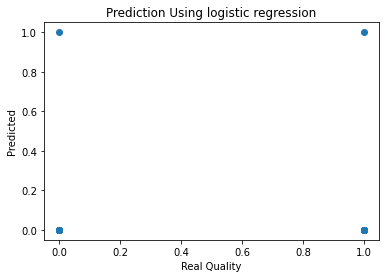

In [71]:
plt.scatter(y_test,y_pred)
plt.title("Prediction Using logistic regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

In [72]:
type(clf)

sklearn.model_selection._search.GridSearchCV

In [73]:
clf.best_estimator_

RandomForestClassifier(max_depth=8)

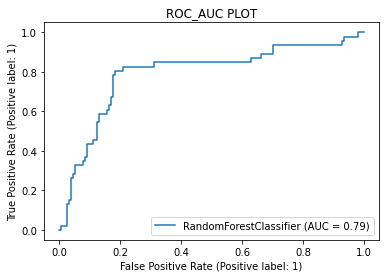

In [74]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf.best_estimator_,X_test,y_test)
plt.title("ROC_AUC PLOT")
plt.show()

In [75]:
#random forest classifier is best model with auc 80%....78% accuracy andf1 score of 87%

In [76]:
#saving the model to local file system
filename='insurance fraud analysis_model.pickle'
pickle.dump(rf,open(filename,'wb'))